## Importing Neccesary Libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
import pandas as pd
train= pd.read_csv('train.csv')

In [3]:
train.head(5)

,dishes_zones,name_of_dish,file
0,Yoruba,amala,0_0_0001.jpeg
1,Yoruba,amala,0_0_0002.jpeg
2,Yoruba,amala,0_0_0003.jpeg
3,Yoruba,amala,0_0_0004.jpeg
4,Yoruba,amala,0_0_0005.jpeg


## Data Preprocessing

In [4]:
train_image=[]
for i in tqdm (range(train.shape[0])):
    
    img= image.load_img('Yoruba/'+train['file'][i], target_size=(170,140), grayscale=False)
    img=image.img_to_array(img)
    img=img/255
    train_image.append(img)
X=np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████████| 338/338 [00:32<00:00, 10.25it/s]


In [5]:
import matplotlib.pyplot as plt
plt.imshow(img[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
train['name_of_dish'].value_counts()

iyan     91
efo      70
amala    68
eba      41
ewedu    40
fufu     28
Name: name_of_dish, dtype: int64

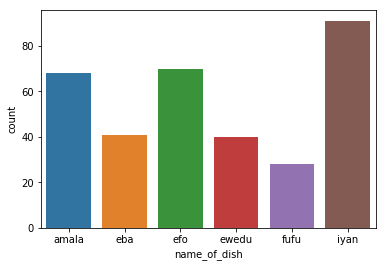

In [7]:
import seaborn as sns
sns.countplot(train['name_of_dish'])

In [8]:
dataset=[train]
dish={'iyan':0, 'efo':1, 'amala':2, 'eba':3, 'ewedu':4, 'fufu':5}
for data in dataset:
    train['dish']=train['name_of_dish'].replace(dish)

* 0: Iyan
* 1: Efo
* 2: Amala
* 3: Eba
* 4: Ewedu
* 5: Fufu

In [9]:
train.head(5)

,dishes_zones,name_of_dish,file,dish
0,Yoruba,amala,0_0_0001.jpeg,2
1,Yoruba,amala,0_0_0002.jpeg,2
2,Yoruba,amala,0_0_0003.jpeg,2
3,Yoruba,amala,0_0_0004.jpeg,2
4,Yoruba,amala,0_0_0005.jpeg,2


In [10]:
labelNames=['iyan', 'efo', 'amala', 'eba', 'ewedu', 'fufu']

In [12]:
y=to_categorical(train['dish'])

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42, test_size=0.2)

## Building the Architecture of the Convolutional Neural Network

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(170,140,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 168, 138, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 69, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 67, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 33, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 41, 33, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86592)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               11083904  
__________

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 270 samples, validate on 68 samples
Epoch 1/10
270/270 [==============================] - ETA: 4:11 - loss: 1.8024 - acc: 0.187 - ETA: 2:27 - loss: 4.8230 - acc: 0.218 - ETA: 1:36 - loss: 5.1400 - acc: 0.197 - ETA: 1:07 - loss: 5.3283 - acc: 0.203 - ETA: 46s - loss: 4.8030 - acc: 0.237 - ETA: 30s - loss: 4.4532 - acc: 0.21 - ETA: 16s - loss: 4.1275 - acc: 0.22 - ETA: 4s - loss: 3.8670 - acc: 0.2227 - 106s 392ms/step - loss: 3.7608 - acc: 0.2222 - val_loss: 1.4778 - val_acc: 0.3088
Epoch 2/10
270/270 [==============================] - ETA: 58s - loss: 1.8144 - acc: 0.25 - ETA: 49s - loss: 1.6869 - acc: 0.29 - ETA: 41s - loss: 1.5885 - acc: 0.37 - ETA: 33s - loss: 1.5359 - acc: 0.43 - ETA: 26s - loss: 1.5043 - acc: 0.45 - ETA: 18s - loss: 1.5205 - acc: 0.44 - ETA: 10s - loss: 1.4832 - acc: 0.45 - ETA: 3s - loss: 1.4620 - acc: 0.4688 - 70s 260ms/step - loss: 1.4402 - acc: 0.4778 - val_loss: 1.3449 - val_acc: 0.6324
Epoch 3/10
270/270 [==============================] - ETA: 48s - 

In [18]:
print(H.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


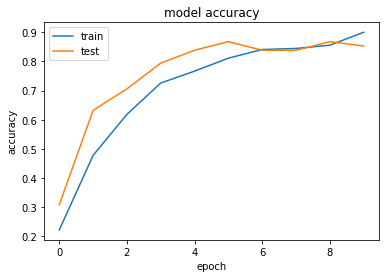

In [19]:
# summarize history for accuracy
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

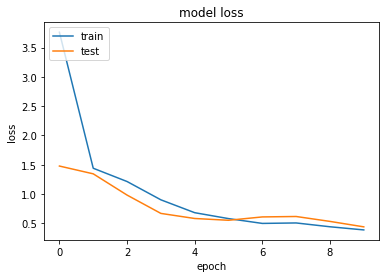

In [20]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [21]:
# make predictions on the test set
preds = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print(accuracy_score(y_test.argmax(axis=1), preds.argmax(axis=1)))

0.8529411764705882


In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

        iyan       0.82      0.93      0.87        15
         efo       0.89      0.94      0.91        17
       amala       1.00      0.77      0.87        13
         eba       0.67      0.80      0.73        10
       ewedu       0.90      0.90      0.90        10
        fufu       1.00      0.33      0.50         3

   micro avg       0.85      0.85      0.85        68
   macro avg       0.88      0.78      0.80        68
weighted avg       0.87      0.85      0.85        68



In [26]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[14  0  0  1  0  0]
 [ 0 16  0  0  1  0]
 [ 1  1 10  1  0  0]
 [ 2  0  0  8  0  0]
 [ 0  1  0  0  9  0]
 [ 0  0  0  2  0  1]]


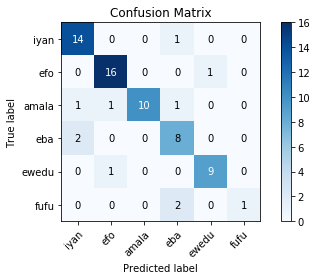

In [27]:
class_names=np.array(('iyan', 'efo', 'amala', 'eba', 'ewedu', 'fufu'))
plot_confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1), classes=class_names, title='Confusion Matrix')